### Packages and Data import

In [1]:
# import packages

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data & preprocess
df = pd.read_csv('../data/creditcard.csv')

df['Hour'] = df['Time'].apply(lambda x: int(np.ceil(float(x)/3600) % 24))
df.drop('Time', axis=1, inplace=True)

df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1


### Sklearn Packages and Train Test Split

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict,cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,roc_curve

In [4]:
X = pd.concat([df.iloc[:,-1],df.loc[:,'V1':'Amount']],axis=1)
y = df['Class']

In [5]:
# Scale features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [9]:
# train test split mantaining y proportion of classes
'''Stratify = y: It is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.'''

x_train,x_test,y_train,y_test = train_test_split(X,y, stratify=y,test_size=0.30, random_state=1)

print(f'y_train class counts:\n {y_train.value_counts()} \n')
print(f'y_test class counts:\n {y_test.value_counts()}')

y_train class counts:
 0    199020
1       344
Name: Class, dtype: int64 

y_test class counts:
 0    85295
1      148
Name: Class, dtype: int64


# Parametric Models

## Logistic Regression

In [7]:
lr_model = LogisticRegression(random_state = 0)
lr_model.fit(x_train,y_train)
pred_lr = lr_model.predict(x_test)

In [8]:
print('True Classes')
print([y_test.value_counts()[0],0],'\n' ,[0,y_test.value_counts()[1]])
print('\n')
print('Predicted Classes')
print(confusion_matrix(y_test,pred_lr))

True Classes
[85295, 0] 
 [0, 148]


Predicted Classes
[[85284    11]
 [   46   102]]


In [13]:
cnf_matrix = confusion_matrix(y_test,pred_lr)

print(classification_report(y_test,pred_lr, target_names=['Non-fraud','Fraud']))

              precision    recall  f1-score   support

   Non-fraud       1.00      1.00      1.00     85295
       Fraud       0.90      0.69      0.78       148

    accuracy                           1.00     85443
   macro avg       0.95      0.84      0.89     85443
weighted avg       1.00      1.00      1.00     85443



Text(0.5, 1.0, 'Logistic Regression Classification')

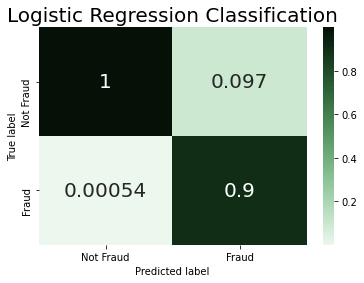

In [23]:
cm_marginal = cnf_matrix/cnf_matrix.sum(axis=0)

sns.heatmap(cm_marginal,
            annot=True,
            annot_kws={"size": 20},
            cmap = sns.cubehelix_palette(start=2, rot=0, dark=0.05, light=.95, reverse=False, as_cmap=True),
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Logistic Regression Classification",fontsize=20)

In [36]:
print(f'Logistic Regression detects {cm_marginal.round(3)[1][1]*100}% of Frauds and {cm_marginal.round(3)[0][0]*100}% of non Frauds')

Logistic Regression detects 90.3% of Frauds and 99.9% of non Frauds


## Support Vector machine

### Support Vector Machine with C default

In [38]:
from sklearn import svm

svm_model = svm.SVC(random_state = 0)
svm_model.fit(x_train,y_train)
pred_svm = svm_model.predict(x_test)

In [39]:
print('True Classes')
print([y_test.value_counts()[0],0],'\n' ,[0,y_test.value_counts()[1]])
print('\n')
print('Predicted Classes')
print(confusion_matrix(y_test,pred_svm))

True Classes
[85295, 0] 
 [0, 148]


Predicted Classes
[[85288     7]
 [   40   108]]


In [40]:
cnf_matrix = confusion_matrix(y_test,pred_svm)

print(classification_report(y_test,pred_svm, target_names=['Non-fraud','Fraud']))

              precision    recall  f1-score   support

   Non-fraud       1.00      1.00      1.00     85295
       Fraud       0.94      0.73      0.82       148

    accuracy                           1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



Text(0.5, 1.0, 'Support Vector Machine Classification')

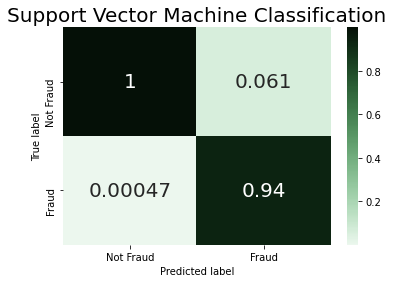

In [41]:
cm_marginal = cnf_matrix/cnf_matrix.sum(axis=0)

sns.heatmap(cm_marginal,
            annot=True,
            annot_kws={"size": 20},
            cmap = sns.cubehelix_palette(start=2, rot=0, dark=0.05, light=.95, reverse=False, as_cmap=True),
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Support Vector Machine Classification",fontsize=20)

In [42]:
print(f'SVM detects {cm_marginal.round(3)[1][1]*100}% of Frauds and {cm_marginal.round(3)[0][0]*100}% of non Frauds')

SVM detects 93.89999999999999% of Frauds and 100.0% of non Frauds


### Support Vector Machine with C search

In [ ]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

## Ridge Regression

### Classic Ridge with alpha = 1 

In [43]:
from sklearn.linear_model import RidgeClassifier

rr_model = RidgeClassifier(alpha=1.0, random_state=0)
rr_model.fit(x_train,y_train)
pred_svm = rr_model.predict(x_test)

In [46]:
cnf_matrix = confusion_matrix(y_test,pred_svm)
cm_marginal = cnf_matrix/cnf_matrix.sum(axis=0)
print(f'Ridge Regression with alpha = 1 detects {cm_marginal.round(3)[1][1]*100}% of Frauds and {cm_marginal.round(3)[0][0]*100}% of non Frauds')

Ridge Regression with alpha = 1 detects 90.2% of Frauds and 99.9% of non Frauds


Text(0.5, 1.0, 'Ridge Regression Classification')

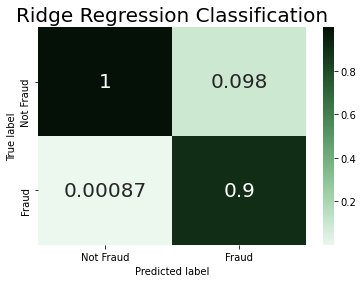

In [45]:
sns.heatmap(cm_marginal,
            annot=True,
            annot_kws={"size": 20},
            cmap = sns.cubehelix_palette(start=2, rot=0, dark=0.05, light=.95, reverse=False, as_cmap=True),
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Ridge Regression Classification",fontsize=20)

### Ridge classification with cross validation 

In [51]:
from sklearn.linear_model import RidgeClassifierCV

# with built in cross validation
rrcv_model = RidgeClassifierCV(alphas=[0.1, 1.0, 10.0])
rrcv_model.fit(x_train,y_train)
pred_svm = rrcv_model.predict(x_test)

In [53]:
cnf_matrix = confusion_matrix(y_test,pred_svm)
cm_marginal = cnf_matrix/cnf_matrix.sum(axis=0)
print(f'Ridge Regression with cross validation detects {cm_marginal.round(3)[1][1]*100}% of Frauds and {cm_marginal.round(3)[0][0]*100}% of non Frauds')

Ridge Regression with cross validation detects 90.2% of Frauds and 99.9% of non Frauds


### Ridge classification parameter search

In [66]:
alpha_parameters = [1e-3, 1e-2, 1e-1, 1, 10, 100]
for a in alpha_parameters:

        prediction = RidgeClassifier(alpha=a, random_state=0).fit(x_train,y_train).predict(x_test)
        cnf_matrix = confusion_matrix(y_test,prediction)
        cm_marginal = cnf_matrix/cnf_matrix.sum(axis=0)

        print(f'Ridge Regression with alpha = {a} detects {cm_marginal.round(5)[1][1]*100}% of Frauds and {cm_marginal.round(4)[0][0]*100}% of non Frauds')

Ridge Regression with alpha = 0.001 detects 90.244% of Frauds and 99.91% of non Frauds
Ridge Regression with alpha = 0.01 detects 90.244% of Frauds and 99.91% of non Frauds
Ridge Regression with alpha = 0.1 detects 90.244% of Frauds and 99.91% of non Frauds
Ridge Regression with alpha = 1 detects 90.244% of Frauds and 99.91% of non Frauds
Ridge Regression with alpha = 10 detects 90.244% of Frauds and 99.91% of non Frauds
Ridge Regression with alpha = 100 detects 90.244% of Frauds and 99.91% of non Frauds
Ridge Regression with alpha = -10000 detects 90.361% of Frauds and 99.91% of non Frauds
